In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import requests
import math


In [115]:
grafitti = pd.read_csv("311_Service_Requests_-_Graffiti_Removal_pastyear.csv")
buildings = pd.read_csv("311_Service_Requests_-_Vacant_and_Abandoned_Buildings_Reported_pastyear.csv")
potholes = pd.read_csv("311_Service_Requests_-_Pot_Holes_Reported_pastyear.csv")
sanitation = pd.read_csv("311_Service_Requests_-_Sanitation_Code_Complaints_pastyear.csv")

In [116]:
grafitti.columns
grafitti = grafitti[['Creation Date', 'Status', 'Completion Date', 'Service Request Number',
       'Type of Service Request', 'Street Address', 'ZIP Code',
       'X Coordinate', 'Y Coordinate', 'Ward', 'Police District',
       'Community Area', 'SSA', 'Latitude', 'Longitude', 'Location','What Type of Surface is the Graffiti on?',
       'Where is the Graffiti located?', ]]
grafitti["311_type"] = "grafitti"

In [117]:
potholes.columns
potholes = potholes[['CREATION DATE', 'STATUS', 'COMPLETION DATE', 'SERVICE REQUEST NUMBER',
       'TYPE OF SERVICE REQUEST', 'STREET ADDRESS', 'ZIP',
       'X COORDINATE', 'Y COORDINATE', 'Ward', 'Police District',
       'Community Area', 'SSA', 'LATITUDE', 'LONGITUDE', 'LOCATION','CURRENT ACTIVITY', 'MOST RECENT ACTION',
       'NUMBER OF POTHOLES FILLED ON BLOCK']]


In [118]:
potholes.columns = ['Creation Date', 'Status', 'Completion Date', 'Service Request Number', 
                   'Type of Service Request', 'Street Address', 'ZIP Code', 'X Coordinate', 'Y Coordinate',
                   'Ward', 'Police District', 'Community Area', 'SSA', 'Latitude', 'Longitude', 
                   'Location','CURRENT ACTIVITY', 'MOST RECENT ACTION', 'NUMBER OF POTHOLES FILLED ON BLOCK']
#potholes["311_type"] = "potholes"

In [88]:
sanitation[:3]
#sanitation["311_type"] = "sanitation"

,Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,What is the Nature of this Code Violation?,Street Address,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,Latitude,Longitude,Location
0,04/02/2016,Completed,04/04/2016,16-02213014,Sanitation Code Violation,Garbage in alley,5222 W HENDERSON ST,60641.0,1.140960e+06,1.921774e+06,31.0,16.0,15.0,41.941431,-87.757325,"(41.9414309384572, -87.757325236866)"
1,04/02/2016,Completed,04/04/2016,16-02213454,Sanitation Code Violation,Garbage in yard,3227 N ORIOLE AVE,60634.0,1.124858e+06,1.920565e+06,29.0,16.0,17.0,41.938397,-87.816535,"(41.93839685238862, -87.81653489442319)"
2,04/02/2016,Completed,04/04/2016,16-02215043,Sanitation Code Violation,Other,2110 W 72ND ST,60636.0,1.163552e+06,1.856899e+06,17.0,7.0,67.0,41.762960,-87.676114,"(41.76296030973299, -87.67611403034516)"


In [119]:
buildings = buildings[['DATE SERVICE REQUEST WAS RECEIVED', 'SERVICE REQUEST NUMBER', 'SERVICE REQUEST TYPE',
                       'ADDRESS STREET NUMBER', 'ADDRESS STREET DIRECTION','ADDRESS STREET NAME', 'ADDRESS STREET SUFFIX', 'ZIP CODE',
       'X COORDINATE', 'Y COORDINATE', 'Ward', 'Police District',
       'Community Area', 'LATITUDE', 'LONGITUDE', 'Location',
       'LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).',
       'IS THE BUILDING DANGEROUS OR HAZARDOUS?',
       'IS BUILDING OPEN OR BOARDED?',
       'IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?',
       'IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?',
       'IS THE BUILDING VACANT DUE TO FIRE?',
       'ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)',]]

In [120]:
buildings.columns = ["Creation Date", "Service Request Number", "Type of Service Request",'ADDRESS STREET NUMBER',
       'ADDRESS STREET DIRECTION', 'ADDRESS STREET NAME',
       'ADDRESS STREET SUFFIX', 'ZIP Code', 'X Coordinate', 'Y Coordinate',
       'Ward', 'Police District', 'Community Area', 'Latitude', 'Longitude',
       'Location',
       'LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).',
       'IS THE BUILDING DANGEROUS OR HAZARDOUS?',
       'IS BUILDING OPEN OR BOARDED?',
       'IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?',
       'IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?',
       'IS THE BUILDING VACANT DUE TO FIRE?',
       'ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)']


In [121]:
buildings["Street Address"] = buildings["ADDRESS STREET NUMBER"].map(str) + " " + buildings["ADDRESS STREET DIRECTION"] + " " + buildings["ADDRESS STREET NAME"] + " " + buildings["ADDRESS STREET SUFFIX"]

In [122]:
buildings.drop(["ADDRESS STREET NUMBER", "ADDRESS STREET DIRECTION", "ADDRESS STREET NAME", "ADDRESS STREET SUFFIX"], axis = 1, inplace=True)

In [428]:
#buildings["311_type"] = "buildings"

In [60]:
buildings["Type of Service Request"]

0       Vacant/Abandoned Building
1       Vacant/Abandoned Building
2       Vacant/Abandoned Building
3       Vacant/Abandoned Building
4       Vacant/Abandoned Building
5       Vacant/Abandoned Building
6       Vacant/Abandoned Building
7       Vacant/Abandoned Building
8       Vacant/Abandoned Building
9       Vacant/Abandoned Building
10      Vacant/Abandoned Building
11      Vacant/Abandoned Building
12      Vacant/Abandoned Building
13      Vacant/Abandoned Building
14      Vacant/Abandoned Building
15      Vacant/Abandoned Building
16      Vacant/Abandoned Building
17      Vacant/Abandoned Building
18      Vacant/Abandoned Building
19      Vacant/Abandoned Building
20      Vacant/Abandoned Building
21      Vacant/Abandoned Building
22      Vacant/Abandoned Building
23      Vacant/Abandoned Building
24      Vacant/Abandoned Building
25      Vacant/Abandoned Building
26      Vacant/Abandoned Building
27      Vacant/Abandoned Building
28      Vacant/Abandoned Building
29      Vacant

In [123]:
df1 = pd.concat([grafitti, potholes, sanitation, buildings])
df1.reset_index(drop=True, inplace=True)

In [416]:
counts = df1['Type of Service Request'].value_counts()
counts

Graffiti Removal             116895
Pothole in Street             55801
Sanitation Code Violation     21453
Vacant/Abandoned Building      4718
Name: Type of Service Request, dtype: int64

In [91]:
dates = set(df1["Creation Date"])
dates_lst = []
num_g = []
num_p = []
num_s = []
num_b = []
for date in dates:
    df2 = df1[df1["Creation Date"] == date]
    dates_lst.append(date)
    num_g.append(len(df2[df2["311_type"] == "grafitti"]))
    num_p.append(len(df2[df2["311_type"] == "potholes"]))
    num_s.append(len(df2[df2["311_type"] == "sanitation"]))
    num_b.append(len(df2[df2["311_type"] == "buildings"]))

In [96]:
plotdf = pd.DataFrame({"dates":dates_lst, "grafitti": num_g, "potholes": num_p, "sanitation": num_s, "buildings": num_b}, index =range(len(dates)))

In [156]:
plotdf["dates"] = pd.to_datetime(plotdf['dates'])
plotdf.sort("dates", inplace=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [157]:
plotdf = plotdf[["dates", "buildings", "grafitti", "potholes", "sanitation"]]
plotdf[:5]

,dates,buildings,grafitti,potholes,sanitation
61,2016-04-02,3,82,99,26
12,2016-04-03,3,103,86,34
36,2016-04-04,20,449,355,64
164,2016-04-05,48,455,713,59
3,2016-04-06,16,477,323,48


In [483]:
#plot number of requests over time 
plotdf.plot(kind='line', x='dates', y='grafitti')
plotdf.plot(kind='line', x='dates', y='potholes')
plotdf.plot(kind='line', x='dates', y='sanitation')
plotdf.plot(kind='line', x='dates', y='buildings')


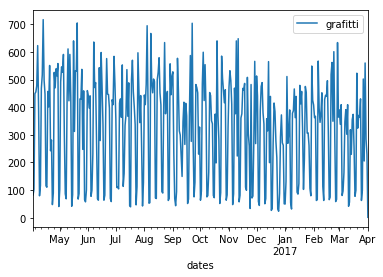

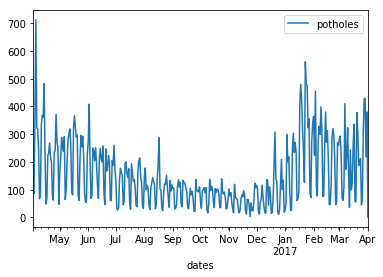

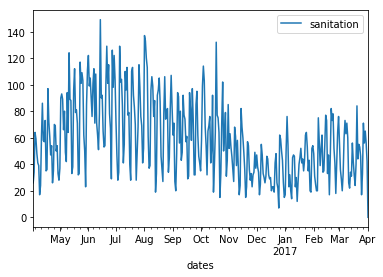

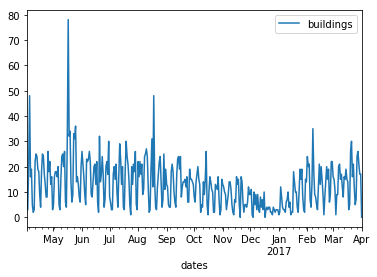

In [484]:
plt.show()

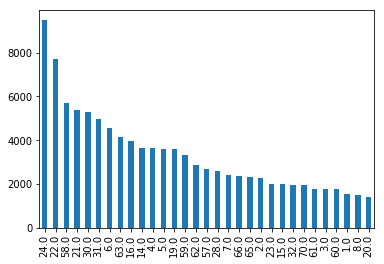

In [8]:
#number of grafitti removal requests by community area
grafitti['Community Area'].value_counts()[:20].plot("bar")
plt.show()

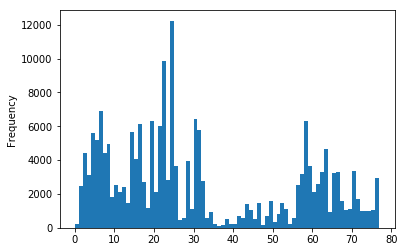

In [469]:
#frequency of requests for each community area
df1['Community Area'].plot('hist', bins=77)
plt.show()

In [489]:
#number of requests of each type, by community area
test = df1.groupby(["Community Area", "311_type"])
test.size().to_frame()

0
Community Area 311_type        
0.0            buildings      1
               grafitti      79
               potholes     141
1.0            buildings      3
               grafitti    1549
               potholes     726
               sanitation   215
2.0            buildings     10
               grafitti    2245
               potholes    1676
               sanitation   480
3.0            buildings      5
               grafitti    1778
               potholes     520
               sanitation   810
4.0            buildings      2
               grafitti    3615
               potholes     726
               sanitation  1245
5.0            buildings     10
               grafitti    3610
               potholes     641
               sanitation   938
6.0            buildings     12
               grafitti    4547
               potholes    1154
               sanitation  1204
7.0            buildings      8
               grafitti    2390
               potholes    1043
...                         ...
67.0           potholes     682
68.0           buildings    337
               grafitti     160
               potholes     541
69.0           buildings    243
               grafitti      67
               potholes     826
70.0           buildings     66
               grafitti    1942
               potholes    1375
71.0           buildings    311
               grafitti     238
               potholes    1133
72.0           buildings     24
               grafitti      72
               potholes     900
73.0           buildings    114
               grafitti      61
               potholes     841
74.0           buildings     21
               grafitti     166
               potholes     832
75.0           buildings     68
               grafitti      92
               potholes     906
76.0           grafitti     163
               potholes     180
77.0           buildings     10
               grafitti    1339
               potholes    1270

[254 rows x 1 columns]

In [124]:
response_df = df1.sample(3000)
response_df.reset_index(drop=True, inplace=True)

In [126]:
response_df["Type of Service Request"]

0                Graffiti Removal
1                Graffiti Removal
2                Graffiti Removal
3                Graffiti Removal
4                Graffiti Removal
5                Graffiti Removal
6               Pothole in Street
7                Graffiti Removal
8                Graffiti Removal
9                Graffiti Removal
10               Graffiti Removal
11               Graffiti Removal
12               Graffiti Removal
13               Graffiti Removal
14               Graffiti Removal
15              Pothole in Street
16               Graffiti Removal
17               Graffiti Removal
18               Graffiti Removal
19               Graffiti Removal
20               Graffiti Removal
21               Graffiti Removal
22      Sanitation Code Violation
23               Graffiti Removal
24              Pothole in Street
25               Graffiti Removal
26               Graffiti Removal
27               Graffiti Removal
28              Pothole in Street
29            

In [127]:
##response time by city##
date_format = "%m/%d/%Y"
diff = []

for i in range(len(response_df)):
    x = pd.to_datetime(response_df.loc[i]["Creation Date"])
    y = pd.to_datetime(response_df.loc[i]["Completion Date"])
    if pd.isnull(x) or pd.isnull(y):
        diff.append(np.nan)
    else:
        d = y-x
        diff.append(d.days)

response_df["Response Time"] = diff

In [128]:
#Average response time by zip code
responses = response_df.groupby(["ZIP Code"])["Response Time"].mean()
responses

ZIP Code
60601.0     2.562500
60602.0     0.000000
60603.0     0.000000
60604.0     0.666667
60605.0    10.916667
60606.0     0.555556
60607.0     3.633333
60608.0     2.509934
60609.0     5.068376
60610.0     2.363636
60611.0     1.937500
60612.0     3.000000
60613.0     2.653846
60614.0     2.764706
60615.0     9.727273
60616.0     2.060606
60617.0     9.142857
60618.0     5.417062
60619.0    11.654545
60620.0    18.764706
60621.0    14.925926
60622.0     1.934579
60623.0     5.656250
60624.0     6.375000
60625.0    14.771429
60626.0    11.965517
60628.0    22.032258
60629.0     5.027778
60630.0     8.974359
60631.0    24.833333
60632.0     1.752212
60633.0     5.428571
60634.0    13.982759
60636.0    12.050000
60637.0    10.055556
60638.0    11.436364
60639.0     9.590000
60640.0     4.839286
60641.0    11.125000
60642.0     2.454545
60643.0    22.666667
60644.0     6.380952
60645.0     8.878788
60646.0    29.619048
60647.0     1.858974
60649.0    12.578947
60651.0     6.722222
6065

In [129]:
#Average reponse time by zip and type of 311 request
responses1 = response_df.groupby(["Type of Service Request", "ZIP Code"])["Response Time"].mean()
responses1

Type of Service Request    ZIP Code
Graffiti Removal           60601.0     0.923077
                           60603.0     0.000000
                           60604.0     0.000000
                           60605.0     0.714286
                           60606.0     0.625000
                           60607.0     1.312500
                           60608.0     0.528000
                           60609.0     0.353659
                           60610.0     1.571429
                           60611.0     0.777778
                           60612.0     0.592593
                           60613.0     0.538462
                           60614.0     1.076923
                           60615.0     0.666667
                           60616.0     0.517241
                           60617.0     0.851852
                           60618.0     0.837079
                           60619.0     0.625000
                           60620.0     0.333333
                           60621.0     0.250000
    

In [130]:
#Average response time for different types of sanitation calls
responses2 = response_df.groupby(["What is the Nature of this Code Violation?"])["Response Time"].mean()
responses2

What is the Nature of this Code Violation?
Construction Site Cleanliness/Fence     3.800000
Dog feces in yard                       8.700000
Dumpster not being emptied              4.608696
Garbage in alley                        7.686275
Garbage in yard                         9.841270
Other                                  10.290323
Overflowing carts                      11.250000
Standing water                         10.000000
Name: Response Time, dtype: float64

In [131]:
#Average response time for different types of graffiti calls
responses3 = response_df.groupby(["What Type of Surface is the Graffiti on?"])["Response Time"].mean()
responses3

What Type of Surface is the Graffiti on?
Aluminum Siding                         0.985507
Brick - Painted                         0.669173
Brick - Unpainted                       0.751479
Cement (Sidewalk, Alley, Wall, Curb)    0.578947
Glass                                   0.647059
Limestone                               1.785714
Marble/Granite                          0.500000
Metal - Painted                         0.465487
Metal - Unpainted                       0.466667
Other / Unknown Surface                 0.848485
Other/Unknown Surface                   1.368421
Stucco                                  1.000000
Tree                                    2.000000
Vinyl Siding                            1.108108
Wood - Painted                          0.533981
Wood - Unpainted                        0.875000
Name: Response Time, dtype: float64

In [134]:
potholes.columns

Index(['Creation Date', 'Status', 'Completion Date', 'Service Request Number',
       'Type of Service Request', 'Street Address', 'ZIP Code', 'X Coordinate',
       'Y Coordinate', 'Ward', 'Police District', 'Community Area', 'SSA',
       'Latitude', 'Longitude', 'Location', 'CURRENT ACTIVITY',
       'MOST RECENT ACTION', 'NUMBER OF POTHOLES FILLED ON BLOCK'],
      dtype='object')

In [52]:
#counts of response times by 311 type
responses = response_df.groupby(["311_type", "Response Time"]) 
responses.size().to_frame()

0
311_type   Response Time     
grafitti   0.0            675
           1.0            320
           2.0             51
           3.0             76
           4.0             17
           5.0              5
           6.0              2
           8.0              1
potholes   0.0             73
           1.0             39
           2.0             23
           3.0             11
           4.0             21
           5.0             23
           6.0             19
           7.0             15
           8.0             14
           9.0             13
           10.0            11
           11.0            11
           12.0            13
           13.0            14
           14.0            17
           15.0            11
           16.0             1
           17.0             8
           18.0             7
           19.0             4
           20.0             5
           21.0             5
...                       ...
sanitation 13.0             2
           14.0             2
           15.0             5
           16.0             3
           17.0             3
           18.0             1
           19.0             2
           20.0             2
           21.0             1
           22.0             2
           23.0             4
           24.0             2
           25.0             2
           26.0             2
           28.0             2
           29.0             3
           30.0             1
           31.0             2
           32.0             1
           33.0             2
           34.0             1
           36.0             1
           37.0             1
           40.0             2
           43.0             1
           49.0             1
           70.0             1
           74.0             1
           120.0            1
           128.0            1

[161 rows x 1 columns]

In [524]:
####Problem 2####

df1["Creation Date"] = pd.to_datetime(df1['Creation Date'])
df1.sort("Creation Date", inplace=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [372]:
#get ACS data 
per_black = []
per_under_10 = []
per_married = []

for i in range(len(df1[:1000])):
    print(i)
    lat = df1.loc[i]["Latitude"]
    lon = df1.loc[i]["Longitude"]
    if math.isnan(lat):
        per_black.append("N/A")
        per_under_10.append("N/A")
        per_married.append("N/A")
        continue
    if math.isnan(lon):
        per_black.append("N/A")
        per_under_10.append("N/A")
        per_married.append("N/A")
        continue
    FIPS_url = "http://data.fcc.gov/api/block/find?format=json&latitude={}&longitude={}&showall=false&format=json".format(lat,lon)
    print(FIPS_url)
    json = requests.get(FIPS_url).json()
    print(json)
    FIPS = json["Block"]["FIPS"]
    if FIPS == None:
        print("NONE")
        per_black.append("N/A")
        per_under_10.append("N/A")
        per_married.append("N/A")
        continue
    state = FIPS[:2]
    county = FIPS[2:5]
    tract = FIPS[5:11]
    block = FIPS[11]
    ACS_url = "http://api.census.gov/data/2015/acs5?get=B01003_001E,B02001_003E,B19101_002E,B11001_003E&for=block+group:{}&in=state:{}+county:{}+tract:{}&key=d86102fa0c1c6f8374fc39c5fe7644aab61be76a".format(block, state, county, tract)
    print(ACS_url)

    r2 = requests.get(ACS_url)
    try: 
        pop = r2.json()[1][0]
    except: 
        per_black.append("N/A")
        per_under_10.append("N/A")
        per_married.append("N/A")
        continue
    
    black = r2.json()[1][1]
    under_10 = r2.json()[1][2]
    married = r2.json()[1][3]
    per_black.append(int(black)/int(pop))
    per_under_10.append(int(under_10)/int(pop))
    per_married.append(int(married)/int(pop))
       

0
http://data.fcc.gov/api/block/find?format=json&latitude=41.88721473824327&longitude=-87.75847143687253&showall=false&format=json
{'Block': {'FIPS': '170312519002003'}, 'County': {'FIPS': '17031', 'name': 'Cook'}, 'State': {'FIPS': '17', 'code': 'IL', 'name': 'Illinois'}, 'status': 'OK', 'executionTime': '526'}
http://api.census.gov/data/2015/acs5?get=B01003_001E,B02001_003E,B19101_002E,B11001_003E&for=block+group:2&in=state:17+county:031+tract:251900&key=d86102fa0c1c6f8374fc39c5fe7644aab61be76a
1
http://data.fcc.gov/api/block/find?format=json&latitude=41.887386672718115&longitude=-87.7621002103669&showall=false&format=json
{'Block': {'FIPS': '170312515004020'}, 'County': {'FIPS': '17031', 'name': 'Cook'}, 'State': {'FIPS': '17', 'code': 'IL', 'name': 'Illinois'}, 'status': 'OK', 'executionTime': '851'}
http://api.census.gov/data/2015/acs5?get=B01003_001E,B02001_003E,B19101_002E,B11001_003E&for=block+group:4&in=state:17+county:031+tract:251500&key=d86102fa0c1c6f8374fc39c5fe7644aab61be

In [379]:
sample_df = df1[:1000]
sample_df["Percent Black"] = per_black
sample_df["Percent Annual Income under $10,000"] = per_under_10
sample_df["Percent Married"] = per_married
sample_df[:5]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,311_type,"ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)",CURRENT ACTIVITY,Community Area,Completion Date,Creation Date,"IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?",IS BUILDING OPEN OR BOARDED?,IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?,IS THE BUILDING DANGEROUS OR HAZARDOUS?,...,Ward,What Type of Surface is the Graffiti on?,What is the Nature of this Code Violation?,Where is the Graffiti located?,X Coordinate,Y Coordinate,ZIP Code,Percent Black,"Percent Annual Income under $10,000",Percent Married
0,grafitti,NaN,NaN,25.0,04/04/2016,2016-04-02,NaN,NaN,NaN,NaN,...,37.0,Metal - Painted,NaN,Front,1.140810e+06,1.902056e+06,60644,0.981605,0.047938,0.045151
43,grafitti,NaN,NaN,63.0,04/04/2016,2016-04-02,NaN,NaN,NaN,NaN,...,14.0,Other/Unknown Surface,NaN,Side,1.156287e+06,1.868652e+06,60632,0.868182,0.000000,0.052727
44,grafitti,NaN,NaN,62.0,04/04/2016,2016-04-02,NaN,NaN,NaN,NaN,...,14.0,Metal - Painted,NaN,Traffic Control Box,1.153223e+06,1.870570e+06,60632,0.303813,0.020910,0.095326
45,grafitti,NaN,NaN,58.0,04/04/2016,2016-04-02,NaN,NaN,NaN,NaN,...,14.0,Other/Unknown Surface,NaN,Side,1.155161e+06,1.873617e+06,60632,0.008346,0.064492,0.172989
3,grafitti,NaN,NaN,16.0,04/04/2016,2016-04-02,NaN,NaN,NaN,NaN,...,45.0,"Cement (Sidewalk, Alley, Wall, Curb)",NaN,Express Way Job,1.147655e+06,1.926673e+06,60641,0.025959,0.000000,0.137698


In [380]:
sample_df["Percent Black"].mean()

0.095763677071701608

In [381]:
sample_df["Percent Annual Income under $10,000"].mean()

0.011315480332279524

In [382]:
sample_df["Percent Married"].mean()

0.13666263533413903

In [386]:
vacants = sample_df[sample_df["311_type"] == "buildings"]
print(vacants["Percent Black"].mean())
print(vacants["Percent Annual Income under $10,000"].mean())
print(vacants["Percent Married"].mean())

0.10560238619
0.0142438908621
0.129026468572


In [387]:
sans = sample_df[sample_df["311_type"] == "sanitation"]
print(sans["Percent Black"].mean())
print(sans["Percent Annual Income under $10,000"].mean())
print(sans["Percent Married"].mean())

0.0749946263416
0.0100438269029
0.136941083215


In [406]:
#####Problem 3#####
#A
prob_zip= len(df1[df1["ZIP Code"] == 60620])/len(df1)
prob_graf = len(grafitti)/len(df1)
prob_zipgivengraf = len(grafitti[grafitti["ZIP Code"] == 60620])/len(grafitti)
prob_grafgivenzip = prob_graf*prob_zipgivengraf/prob_zip
print(prob_grafgivenzip)

prob_san = len(sanitation)/len(df1)
prob_zipgivensan = len(sanitation[sanitation["ZIP Code"] == 60620])/len(sanitation)
prob_sangivenzip = prob_san*prob_zipgivensan/prob_zip
print(prob_sangivenzip)

prob_vac = len(buildings)/len(df1)
prob_zipgivenvac = len(buildings[buildings["ZIP Code"] == 60620])/len(buildings)
prob_vacgivenzip = prob_vac*prob_zipgivenvac/prob_zip
print(prob_vacgivenzip)

prob_pot = len(potholes)/len(df1)
prob_zipgivenpot = len(potholes[potholes["ZIP Code"] == 60620])/len(potholes)
prob_potgivenzip = prob_pot*prob_zipgivenpot/prob_zip
print(prob_potgivenzip)

#Given that the zip code for 7500 S Wolcott Ave is 60620, the most likely call is for potholes.

0.15651135005973715
0.0
0.15571485463958581
0.687773795300677


In [412]:
#B
zip1 = df1["ZIP Code"] == 60652
zip2 = df1["ZIP Code"] == 60623
zip3 = df1["ZIP Code"] == 60624
zip4 = df1["ZIP Code"] == 60644
zip5 = df1["ZIP Code"] == 60612

lawndale_df = df1[zip1 | zip2 | zip3 | zip4 | zip5]
uptown_df = df1[df1["ZIP Code"] == 60640]

In [413]:
prob_L = len(lawndale_df)/len(df1)
prob_U = len(uptown_df)/len(df1)
prob_grafgivenL = len(lawndale_df[lawndale_df["311_type"] == "grafitti"])/len(lawndale_df)
prob_grafgivenU = len(uptown_df[uptown_df["311_type"] == "grafitti"])/len(uptown_df)

prob_Lgivengraf = prob_grafgivenL*prob_L/prob_graf
prob_Ugivengraf = prob_grafgivenU*prob_U/prob_graf
print(prob_Lgivengraf)
print(prob_Ugivengraf)

#Assuming that calls from Lawndale come from zipcodes 60652, 60623, 60624, 60644, 60612, and 
#calls from Uptown come from zipcodes 60640, it is about 4x more likely that the grafitti call came from Lawndale. 

0.17516538885091737
0.048524893521801005


In [407]:
#C
prob_E = 600/1000
prob_U = 400/1000
prob_graf = 260/1000
prob_grafgivenE = 100/600
prob_grafgivenU = 160/400
prob_Egivengraf = prob_grafgivenE*prob_E/prob_graf
prob_Ugivengraf = prob_grafgivenU*prob_U/prob_graf
print(prob_Egivengraf)
print(prob_Ugivengraf)

#It is about 1.6x more likely that the call for grafitti removal came from Uptown. 

0.3846153846153846
0.6153846153846155
